In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# load dataset
df = pd.read_csv("../data/Wednesday-workingHours.pcap_ISCX.csv")

In [4]:
# Display Basic Info
print("Info\n",df.info())
print("Describe\n",df.describe())
print("Head\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Describe
         Destination Port   Flow Duration   Total Fwd Packets  \
count      692703.000000    6.927030e+05       692703.000000   
mean         5686.869462    2.800168e+07            9.556261   
std         15727.423560    4.276680e+07          747.197814   
min             0.000000   -1.000000e+00            1.000000   
25%            53.000000    2.010000e+02            2.000000   
50%            80.000000    6.143700e+04            2.000000   
75%           443.000000    8.302437e+07            7.000000   
max         65487.000000    1.200000e+08       203943.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            692703.000000                 6.927030e+05   
mean                 10.214079                 5.550930e+02   
std                 984.204633                 6.163663e+03   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 1.200000e+01   
50%                   2.000000     

In [5]:
# check for infinity values
print("Infinity values\n",df.isin([float('inf'), -float('inf')]).sum().tolist())

Infinity values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 289, 1297, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
# remove infinity values rows
df = df[~df.isin([float('inf'), -float('inf')]).any(axis=1)]
# check for infinity values
print("Infinity values\n",df.isin([float('inf'), -float('inf')]).sum().tolist())

Infinity values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
# check for missing values & duplicates
print("Missing Values\n",df.isnull().sum().tolist())
print("Duplicates\n",df.duplicated().sum().tolist())

Missing Values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Duplicates
 80914


In [8]:
# remove duplicate rows
df = df.drop_duplicates()
# remove rows with null values
df = df.dropna()

# check for missing values & duplicates again
print("Missing Values\n",df.isnull().sum().tolist())
print("Duplicates\n",df.duplicated().sum().tolist())

Missing Values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Duplicates
 0


In [9]:
# see columns
print("No. of columns:\n",df.shape[1])
print(df.columns)

No. of columns:
 79
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet

In [10]:
# shape of dataset
cols,rows=df.shape

print("No. of rows: ",rows)
print("No. of columns: ",cols)

No. of rows:  79
No. of columns:  610492


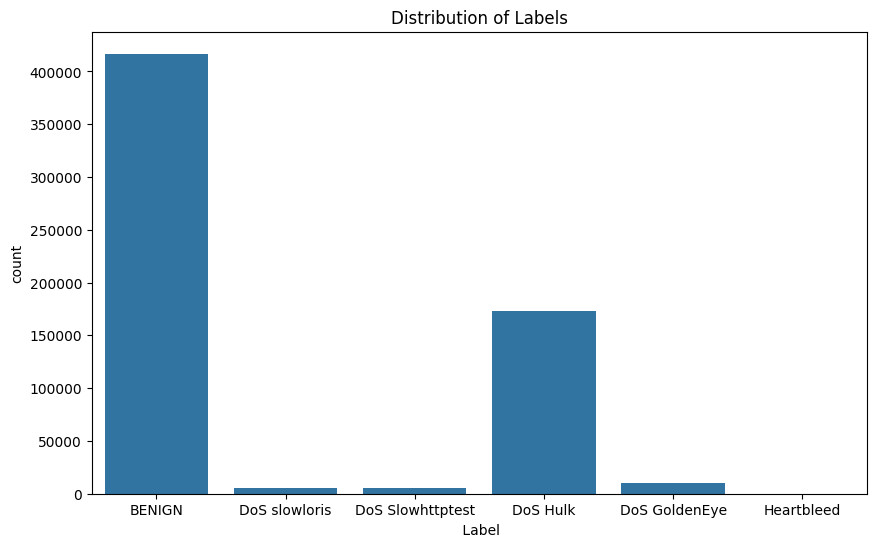

In [11]:
# Check column names
# print(df.columns)

# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=' Label', data=df)  # Note the space before 'Label'
plt.title('Distribution of Labels')
plt.show()

In [12]:
# rename attack labels
df[' Label'] = df[' Label'].replace({
    'BENIGN': 'Normal',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'Heartbleed': 'Exploit',
})

In [13]:
# check for unique values in label column
print("Unique values in Label: ",df[' Label'].nunique())
print("Unique values in Label: ",df[' Label'].unique())

Unique values in Label:  3
Unique values in Label:  ['Normal' 'DoS' 'Exploit']


C:\Users\aayus\AppData\Local\Temp\ipykernel_21976\2986004758.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[' Label'] = df[' Label'].replace({'Normal': 0, 'DoS': 1, 'Exploit': 2})


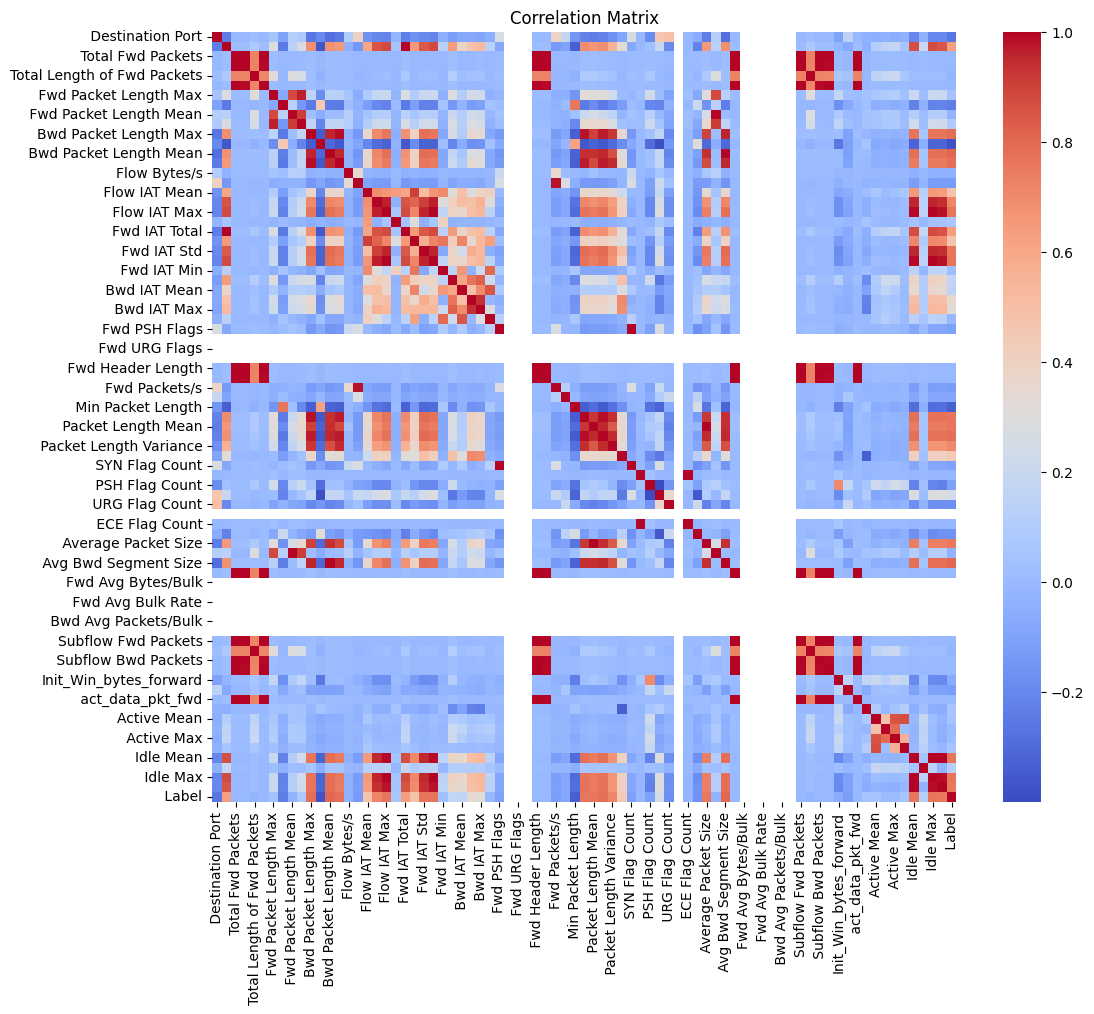

In [14]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
df[' Label'] = df[' Label'].replace({'Normal': 0, 'DoS': 1, 'Exploit': 2})
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')  # Convert to smaller float type

print(df.info())  # Check reduced memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 610492 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             610492 non-null  float32
 1    Flow Duration                610492 non-null  float64
 2    Total Fwd Packets            610492 non-null  float32
 3    Total Backward Packets       610492 non-null  float32
 4   Total Length of Fwd Packets   610492 non-null  float32
 5    Total Length of Bwd Packets  610492 non-null  float32
 6    Fwd Packet Length Max        610492 non-null  float32
 7    Fwd Packet Length Min        610492 non-null  float32
 8    Fwd Packet Length Mean       610492 non-null  float32
 9    Fwd Packet Length Std        610492 non-null  float32
 10  Bwd Packet Length Max         610492 non-null  float32
 11   Bwd Packet Length Min        610492 non-null  float32
 12   Bwd Packet Length Mean       610492 non-null  fl

Min Max Normalization

In [16]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

Z-Score Normalization

In [17]:
scaler=StandardScaler()
df_standardized=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [18]:
asd

NameError: name 'asd' is not defined

Apply PCA

In [ ]:
pca = PCA(n_components=4)
df_pca=pca.fit_transform(df_standardized)

# Create a DataFrame with PCA results
df_pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
print(df_pca_df.head())

NameError: name 'PCA' is not defined

Viz PCA Results

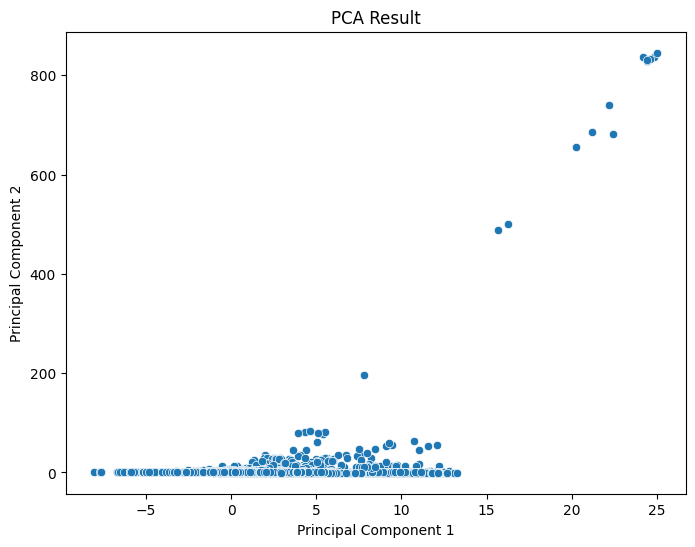

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_df['PC1'], y=df_pca_df['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.show()


In [ ]:
# Assume the last column is the target variable
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

# Standardize the dataset
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

x_train_df=pd.DataFrame(x_train,columns=x.columns)

In [ ]:
lr=LogisticRegression()

In [ ]:
svc=SVC()

In [ ]:
rf=RandomForestClassifier()

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
models={
    'Logistic Regression': lr,
    'SVM': svc,
    'Random Forest': rf,
    'Decision Tree': dtc,
    'KNN': knn
}

In [ ]:
results = {}

for name, model in models.items():
    if isinstance(model, tuple):
        model = model[0]  # Extract the model from the tuple
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

d:\1OnGitHub\intrusion-detection\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

{'Logistic Regression': {'Accuracy': 0.9885257045512248,
  'Precision': 0.9885212223272057,
  'Recall': 0.9885257045512248,
  'F1 Score': 0.9885231415033625,
  'Confusion Matrix': array([[82571,   668],
         [  733, 38127]])},
 'SVM': {'Accuracy': 0.9894675632069059,
  'Precision': 0.9896604242259439,
  'Recall': 0.9894675632069059,
  'F1 Score': 0.9894999762681603,
  'Confusion Matrix': array([[82135,  1104],
         [  182, 38678]])},
 'Random Forest': {'Accuracy': 0.9993120336775895,
  'Precision': 0.9993120248560361,
  'Recall': 0.9993120336775895,
  'F1 Score': 0.9993120289579309,
  'Confusion Matrix': array([[83198,    41],
         [   43, 38817]])},
 'Decision Tree': {'Accuracy': 0.9995167855592593,
  'Precision': 0.9995167890284412,
  'Recall': 0.9995167855592593,
  'F1 Score': 0.9995167872166123,
  'Confusion Matrix': array([[83209,    30],
         [   29, 38831]])},
 'KNN': {'Accuracy': 0.9990417611937854,
  'Precision': 0.9990421800545961,
  'Recall': 0.99904176119378